# Parts of Speech Tagging

POS tagging is a common processing step in NLP.

If we have POS tagged, we can often already determine who is doing what to whom:

- N V N
- Subject Action Object
- John eats pizza

But this is kind of illusory, because "correct" tagging actually requires correct parsing:

- Fruit flies like banana.
- N V PP N
- N N V N


"Time flies like an arrow, but fruit flies like banana."

- Buffalo buffalo buffalo buffalo.
- A N V N
- N V A N
- A A N V
- V A A N

Still, we can tag correctly often enough using statistical methods to be practically useful for information retrieval. However, POS tagging can never be totally correct, it's always a heuristic.

(We could require a POS tagger to return all possible tags for each word, or all possible overall assignments for tags.)

In [342]:
from nltk.corpus import wordnet

In [343]:
for s in wordnet.synsets("buffalo"):
    print s.name,s.definition

american_bison.n.01 large shaggy-haired brown bison of North American plains
buffalo.n.02 a city on Lake Erie in western New York (near Niagara Falls)
buffalo.n.03 meat from an American bison
old_world_buffalo.n.01 any of several Old World animals resembling oxen including, e.g., water buffalo; Cape buffalo
buffalo.v.01 intimidate or overawe


In part, we're looking at how NLTK does this because in terms of
research, it's interesting to ask how we can do better (say,
using recurrent neural networks or finite state transducers).

# Tagged Corpora

In [344]:
from nltk.corpus import brown
import nltk.tag # fix the default simplification map
nltk.tag.brown_mapping1["dt"] = "DET"
nltk.tag.brown_mapping1["do"] = "V"

In [345]:
tagged = brown.tagged_words()

In [346]:
print len(tagged)
print tagged[:40]

1161192
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.'), ('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD')]


In [347]:
tagged = brown.tagged_words(simplify_tags=True)
print len(tagged)
print tagged[:40]

1161192
[('The', 'DET'), ('Fulton', 'NP'), ('County', 'N'), ('Grand', 'ADJ'), ('Jury', 'N'), ('said', 'VD'), ('Friday', 'N'), ('an', 'DET'), ('investigation', 'N'), ('of', 'P'), ("Atlanta's", 'NP'), ('recent', 'ADJ'), ('primary', 'N'), ('election', 'N'), ('produced', 'VD'), ('``', '``'), ('no', 'DET'), ('evidence', 'N'), ("''", "''"), ('that', 'CNJ'), ('any', 'DET'), ('irregularities', 'N'), ('took', 'VD'), ('place', 'N'), ('.', '.'), ('The', 'DET'), ('jury', 'N'), ('further', 'ADV'), ('said', 'VD'), ('in', 'P'), ('term-end', 'N'), ('presentments', 'N'), ('that', 'CNJ'), ('the', 'DET'), ('City', 'N'), ('Executive', 'ADJ'), ('Committee', 'N'), (',', ','), ('which', 'WH'), ('had', 'V')]


Most common proper nouns.

In [348]:
np = sorted(list(set([n for n,c in tagged if c=="NP"])))
print len(np)
np[1000:1010]

9765


['Blaber',
 'Black',
 "Black's",
 'Blackberry',
 'Blackfeet',
 'Blackman',
 'Blackmer',
 'Blacks',
 'Blackstone',
 'Blackwell']

In [349]:
"""
ADJ	adjective	new, good, high, special, big, local
ADV	adverb	really, already, still, early, now
CNJ	conjunction	and, or, but, if, while, although
DET	determiner	the, a, some, most, every, no
EX	 existential	there, there's
FW	 foreign word	dolce, ersatz, esprit, quo, maitre
MOD	modal verb	will, can, would, may, must, should
N	  noun	year, home, costs, time, education
NP	 proper noun	Alison, Africa, April, Washington
NUM	number	twenty-four, fourth, 1991, 14:24
PRO	pronoun	he, their, her, its, my, I, us
P	  preposition	on, of, at, with, by, into, under
TO	 the word to	to
UH	 interjection	ah, bang, ha, whee, hmpf, oops
V	  verb	is, has, get, do, make, see, run
VD	 past tense	said, took, told, made, asked
VG     present participle	making, going, playing, working
VN	 past participle	given, taken, begun, sung
WH	 wh determiner	who, which, when, what, where, how
"""; None

Most common verbs.

In [350]:
Counter((w,t) for w,t in tagged if t.startswith("V")).most_common(10)

[(('is', 'V'), 10010),
 (('was', 'V'), 9777),
 (('be', 'V'), 6342),
 (('had', 'V'), 5101),
 (('are', 'V'), 4333),
 (('have', 'V'), 3892),
 (('were', 'V'), 3279),
 (('been', 'V'), 2470),
 (('has', 'V'), 2424),
 (('said', 'VD'), 1738)]

In [351]:
freq = nltk.FreqDist(tag for word,tag in tagged)

In [352]:
freq.items()[:10]

[('N', 229788),
 ('DET', 136425),
 ('P', 122591),
 ('V', 87519),
 ('ADJ', 71994),
 ('PRO', 66793),
 ('.', 61254),
 ('CNJ', 60326),
 (',', 58336),
 ('ADV', 43934)]

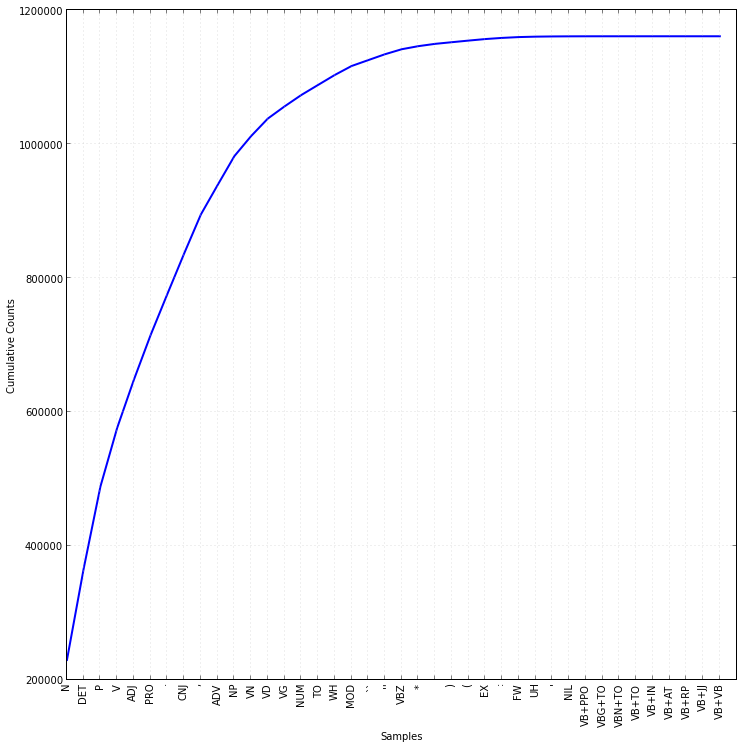

In [353]:
freq.plot(cumulative=True)

# N-Grams

In [354]:
from collections import Counter
Counter(c for w,c in tagged)

Counter({'N': 229788, 'DET': 136425, 'P': 122591, 'V': 87519, 'ADJ': 71994, 'PRO': 66793, '.': 61254, 'CNJ': 60326, ',': 58336, 'ADV': 43934, 'NP': 43179, 'VN': 29932, 'VD': 26192, 'VG': 18188, 'NUM': 17024, 'TO': 14998, 'WH': 14919, 'MOD': 13345, '``': 8837, "''": 8789, 'VBZ': 7469, '*': 4613, '': 3431, ')': 2457, '(': 2426, 'EX': 2280, ':': 1718, 'FW': 1226, 'UH': 629, "'": 317, 'NIL': 157, 'VB+PPO': 71, 'VBG+TO': 17, 'VBN+TO': 5, 'VB+TO': 4, 'VB+IN': 3, 'VB+AT': 2, 'VB+RP': 2, 'VB+VB': 1, 'VB+JJ': 1})

In [355]:
bg = nltk.bigrams(tag for word,tag in tagged[:10000])
freq = nltk.FreqDist(bg)
print freq.items()[:10]

[(('DET', 'N'), 686), (('N', 'P'), 603), (('N', 'N'), 452), (('P', 'DET'), 448), (('ADJ', 'N'), 412), (('P', 'N'), 238), (('N', '.'), 235), (('DET', 'ADJ'), 216), (('N', ','), 204), (('V', 'DET'), 159)]


In [356]:
from itertools import *
def ibigrams(l):
    return izip(l,islice(l,1,None))

In [357]:
def gcat(l):
    return " ".join([x[1] for x in l])
def gwords(l):
    return " ".join([x[0] for x in l])

In [358]:
gcat(nltk.bigrams(tagged[:10])[0])

'DET NP'

In [359]:
bic = Counter(gcat(x) for x in ibigrams(tagged))
bic.most_common(10)

[('DET N', 74300),
 ('N P', 59944),
 ('P DET', 52654),
 ('ADJ N', 45836),
 ('DET ADJ', 29884),
 ('N .', 29522),
 ('N ,', 28025),
 ('P N', 25040),
 ('N N', 24310),
 ('N CNJ', 18705)]

In [360]:
sent5 = [gcat(s) for s in brown.tagged_sents(simplify_tags=True) if len(s)==6]
sent5[:3]

['PRO N VD ADJ N .', 'NP , NP ( N )', 'NP , NP ( N )']

In [361]:
Counter(x for x in ibigrams(tagged) if gcat(x)=="DET NP").most_common(10)

[((('the', 'DET'), ('U.S.', 'NP')), 76),
 ((('the', 'DET'), ('Congo', 'NP')), 49),
 ((('the', 'DET'), ('U.N.', 'NP')), 37),
 ((('the', 'DET'), ('U.', 'NP')), 36),
 ((('the', 'DET'), ('Bible', 'NP')), 34),
 ((('the', 'DET'), ('Negro', 'NP')), 31),
 ((('the', 'DET'), ('Congress', 'NP')), 27),
 ((('the', 'DET'), ('Russians', 'NP')), 23),
 ((('the', 'DET'), ('Chicago', 'NP')), 23),
 ((('the', 'DET'), ('Lo', 'NP')), 19)]

In [362]:
Counter(gwords(x) for x in nltk.ingrams(tagged,4) if gcat(x)=="ADJ ADJ ADJ N").most_common(10)

[('American Catholic higher education', 4),
 ('light green nonspecific fluorescence', 2),
 ('early English historical circles', 1),
 ('plain old black dirt', 1),
 ('Such additional daytime class', 1),
 ('sturdy little three-masted bark', 1),
 ('such traditional Japanese foods', 1),
 ('official American Catholic project', 1),
 ('hard cruel bony skull', 1),
 ('continuous critical public scrutiny', 1)]

# Relationship Mining

For relationship mining, we try to determine how related two objects
are by seeing how often they are mentioned together.

There are many ways in which this can be done.
For example, relationships may be given explicitly in Facebook or FOAF.

But often, we only have text available.
Let's try to do some simple relationship mining on the Brown corpus.

We start with the tagged sentences, and assume that there is some
relationship between two objects if they are mentioned in the same sentence.

In [363]:
stagged = brown.tagged_sents(simplify_tags=True)
stagged[2]

[('The', 'DET'),
 ('September-October', 'NP'),
 ('term', 'N'),
 ('jury', 'N'),
 ('had', 'V'),
 ('been', 'V'),
 ('charged', 'VN'),
 ('by', 'P'),
 ('Fulton', 'NP'),
 ('Superior', 'ADJ'),
 ('Court', 'N'),
 ('Judge', 'N'),
 ('Durwood', 'NP'),
 ('Pye', 'NP'),
 ('to', 'TO'),
 ('investigate', 'V'),
 ('reports', 'N'),
 ('of', 'P'),
 ('possible', 'ADJ'),
 ('``', '``'),
 ('irregularities', 'N'),
 ("''", "''"),
 ('in', 'P'),
 ('the', 'DET'),
 ('hard-fought', 'ADJ'),
 ('primary', 'N'),
 ('which', 'WH'),
 ('was', 'V'),
 ('won', 'VN'),
 ('by', 'P'),
 ('Mayor-nominate', 'N'),
 ('Ivan', 'NP'),
 ('Allen', 'NP'),
 ('Jr.', 'NP'),
 ('.', '.')]

Tagging is on a per-word basis, but "objects" are often referred to by multiple names.
So, we need to write a function to collapse multiple adjacent words if they have
the same tag.

Actually, what we really want is a chunker. However, since we're working with manually
tagged data, we need to do this kind of "chunking" based on tags and words.


The `itertools.groupby` function helps us with that.
You should learn about `itertools`; it is somewhat analogous
to UNIX command line programs like `uniq` etc.

In [364]:
def collapse(s):
    """Collapse adjacent words if the have same tag."""
    return [(" ".join(x[0] for x in g),k) for k,g in groupby(s,lambda x:x[1])]
collapse(stagged[2])

[('The', 'DET'),
 ('September-October', 'NP'),
 ('term jury', 'N'),
 ('had been', 'V'),
 ('charged', 'VN'),
 ('by', 'P'),
 ('Fulton', 'NP'),
 ('Superior', 'ADJ'),
 ('Court Judge', 'N'),
 ('Durwood Pye', 'NP'),
 ('to', 'TO'),
 ('investigate', 'V'),
 ('reports', 'N'),
 ('of', 'P'),
 ('possible', 'ADJ'),
 ('``', '``'),
 ('irregularities', 'N'),
 ("''", "''"),
 ('in', 'P'),
 ('the', 'DET'),
 ('hard-fought', 'ADJ'),
 ('primary', 'N'),
 ('which', 'WH'),
 ('was', 'V'),
 ('won', 'VN'),
 ('by', 'P'),
 ('Mayor-nominate', 'N'),
 ('Ivan Allen Jr.', 'NP'),
 ('.', '.')]

Next, for each sentence, we just filter out the proper nouns.

In [365]:
def NPlist(s):
    """Return a list of proper nouns in a sequence of tags."""
    return [x[0] for x in s if x[1]=="NP"]

NPlist(collapse(stagged[2]))

['September-October', 'Fulton', 'Durwood Pye', 'Ivan Allen Jr.']

In [366]:
nps = (NPlist(collapse(s)) for s in stagged)
list(islice(nps,10))

[['Fulton', "Atlanta's"],
 ['Atlanta'],
 ['September-October', 'Fulton', 'Durwood Pye', 'Ivan Allen Jr.'],
 [],
 ["Georgia's"],
 ['Fulton'],
 ['Atlanta', 'Fulton'],
 [],
 [],
 []]

We really just want those sentences that actually mention more than one proper noun.

In [367]:
nps = (x for x in nps if len(x)>1)
list(islice(nps,10))

[['Fulton', 'Fulton'],
 ["Atlanta's", 'Jan.'],
 ['Atlanta', 'Fulton', 'Bellwood', 'Alpharetta', 'Grady', 'Fulton'],
 ['William B. Hartsfield', 'Pearl Williams Hartsfield', 'Fulton'],
 ['William Berry Jr.', 'Mrs. J. M. Cheshire', 'Griffin'],
 ['Opelika', 'Ala.'],
 ['Hartsfield', 'E. Pelham'],
 ['Hartsfield', 'Atlanta'],
 ['Ivan Allen Jr.', 'Sept.', 'Hartsfield'],
 ['James W. Dorsey', 'Sept.', 'Savannah', 'Texas', 'John Tower']]

As you can see, there is a wide variety of ways of referring to people,
including titles, initials, etc.

Solving the problem of mapping names to identities in general is a hard
problem (c.f. authorship attribution).
But we can prototype something with a little bit of regular expression magic.

In [368]:
def NPnormalize(s,targets=["Kennedy","Khrushchev"]):
    """Normalize proper names by stripping prefixes/suffixes etc."""
    for t in targets: 
        if t in s: return t
    s = re.sub(r'^(Mr|Mrs|Dr|Prof|Professor)\.?','',s)
    s = re.sub(r'[A-Z]\.\s','',s)
    s = re.sub(r"'s","",s)
    s = re.sub(r'\W+',' ',s)
    return s.strip()
NPnormalize("Mr. Kennedy, Jr.")

'Kennedy'

With these functions, we can now get a reasonable list of proper nouns
for each sentence.

In [369]:
nps = [[NPnormalize(x) for x in l] for l in nps]
list(islice(nps,10))

[['Sam Caldwell', 'Garland Byrd'],
 ['Rob Ledford', 'Gainesville'],
 ['Caldwell', 'Byrd'],
 ['Vandiver', 'Marvin Griffin'],
 ['Schley', 'Pelham'],
 ['Pelham', 'Georgia', 'November'],
 ['Jackson', 'Georgia'],
 ['Barber', 'Washington'],
 ['Harry Davis', 'Felix Bush', 'Miller'],
 ['Davis', 'Bush']]

We are interested in co-occurring pairs. Instead of nested loops,
we use `itertools.combinations` to find these.

In [370]:
pairs = [tuple(sorted(x)) for l in nps for x in combinations(l,2)]
Counter(pairs).most_common(10)

[(('Brown', 'Sharpe'), 38),
 (('B', 'C'), 29),
 (('D C', 'Washington'), 26),
 (('God', 'God'), 26),
 (('Mantle', 'Maris'), 23),
 (('B', 'O'), 22),
 (('Paris', 'Paris'), 22),
 (('A', 'B'), 21),
 (('Palmer', 'Player'), 19),
 (('Pike', 'Woodruff'), 18)]

There are still some pairs in here that we don't want. Let's filter those out.

In [371]:
pairs = [(u,v) for u,v in pairs if len(u)>2 and len(v)>2 and u!=v]
Counter(pairs).most_common(10)

[(('Brown', 'Sharpe'), 38),
 (('D C', 'Washington'), 26),
 (('Mantle', 'Maris'), 23),
 (('Palmer', 'Player'), 19),
 (('Pike', 'Woodruff'), 18),
 (('Oct', 'Sept'), 17),
 (('Delaware', 'Du Pont'), 16),
 (('God', 'Jesus Christ'), 16),
 (('Miriam', 'Wright'), 16),
 (('Christiana', 'Delaware'), 15)]

The entire graph is too large, but let's focus on two nodes: 

In [372]:
relations = [p for p in Counter(pairs).items() \
    if re.search("Kennedy|Khrushchev"," ".join(p[0])) and p[1]>3]
print len(relations)
print relations[:10]

12
[(('Congress', 'Khrushchev'), 7), (('Eisenhower', 'Kennedy'), 4), (('Kennedy', 'Laos'), 6), (('Kennedy', 'U S'), 4), (('Khrushchev', 'Moscow'), 4), (('China', 'Khrushchev'), 5), (('Cuba', 'Kennedy'), 4), (('Kennedy', 'Khrushchev'), 8), (('Kennedy', 'Nixon'), 4), (('Berlin', 'Kennedy'), 6)]


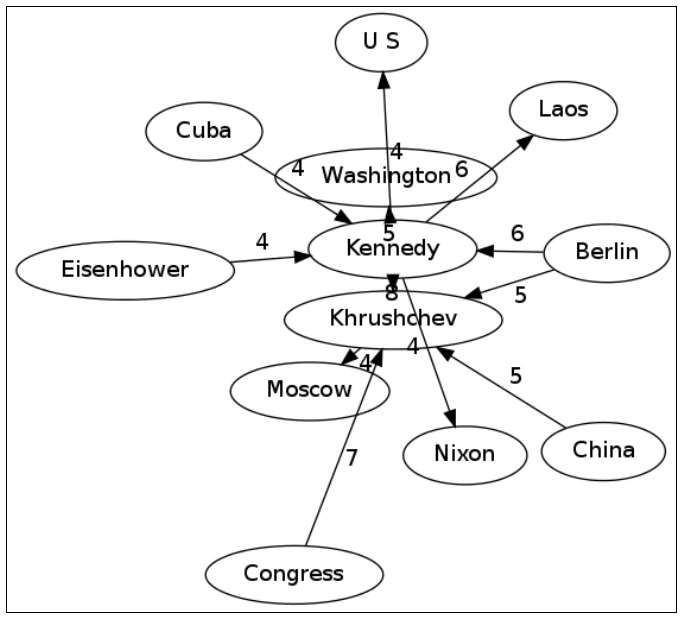

In [373]:
import pydot
graph = pydot.Dot()
for (u,v),n in relations:
    graph.add_edge(pydot.Edge(u,v,label=str(n)))
graph.write_png("/tmp/_test.png",prog="fdp")
figsize(12,12)
gca().set_xticks([]); gca().set_yticks([])
imshow(imread("/tmp/_test.png"))

For visualizing large relationship graphs, there are special tools:

- http://gephi.org/
- http://gephi.org/2010/openord-new-layout-plugin-the-fastest-algorithm-so-far/
- http://www.textarc.org/
- ...